In [19]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif,chi2,f_classif,SelectKBest
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import numpy as np
# from skopt.space import Integer
# from skopt.space import Real
# from skopt.space import Categorical
# from skopt import BayesSearchCV
import pickle
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras_tuner import BayesianOptimization
from sklearn.preprocessing import MinMaxScaler
import keras_tuner

In [25]:
import os
os.listdir('c:\\Users\\patri\\Documents\\FH_Technikum\\CS\\Master\\MA_ML_Phishing\\MA_ML_Phishing\\Prototype\\code\\after_validation\\hyperparameter_tuning\\neuronal_network\\v1\\logs')

['phishing_tuning_v1']

In [20]:
pd.read_csv('c:\\Users\\patri\\Documents\\FH_Technikum\\CS\\Master\\MA_ML_Phishing\\MA_ML_Phishing\\Prototype\\training_data\\variance_cleanup_features_corrected\\variance_cleanup_selected_features_corrected.csv')

,url,phishing,https_true,url_digits_count,url_lenght,url_dot_count,url_underline_count,url_hyphen_count,url_slash_count,url_questionmark_count,...,html_hl_external_favicon,html_hl_external_null_form,html_domain_titel,html_windows_status,html_prompt,html_unsafe_anchor,html_iframe_invisible,html_empty_title,openpagescore,cantina
0,https://www.paducahbank.com/Learn/Whats-Happen...,0,1,0,87,2,0,3,7,0,...,0.0,0.0,0,0,0,1,0,0,4,1.0
1,https://whatis.techtarget.com/definition/input...,0,1,0,57,2,0,3,4,0,...,0.0,0.0,0,0,0,1,0,0,6,1.0
2,https://endeavour.org.uk/,0,1,0,25,2,0,0,3,0,...,0.0,0.0,0,0,0,1,0,0,3,1.0
3,https://gb.123rf.com/footage_121810088_online-...,0,1,21,159,3,2,15,3,1,...,0.0,0.0,0,0,0,1,0,0,6,1.0
4,https://www.what-song.com/Movies/Soundtrack/16...,0,1,4,68,2,0,4,6,0,...,0.0,0.0,0,0,0,0,0,0,5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,http://smbc-wy.com,1,0,0,18,1,0,1,2,0,...,0.0,0.0,0,0,0,1,0,0,0,0.0
19996,http://seuspontosnatalinosincluaseuspontoshoje...,1,0,7,186,2,0,1,9,1,...,0.0,0.0,0,0,0,0,0,0,0,0.0
19997,https://verificarlbcponline.papomz.com/,1,1,0,39,2,0,0,3,0,...,0.0,0.0,0,0,0,0,0,0,0,0.0
19998,http://xarconentertainment.sexxyfemaledolls.co...,1,0,23,94,3,0,0,5,0,...,1.0,0.0,0,0,0,1,0,0,0,0.0


In [21]:
cleaned_df=pd.read_csv('c:\\Users\\patri\\Documents\\FH_Technikum\\CS\\Master\\MA_ML_Phishing\\MA_ML_Phishing\\Prototype\\training_data\\variance_cleanup_features_corrected\\variance_cleanup_selected_features_corrected.csv')
cleaned_df.set_index('url',inplace=True)

In [22]:
cleaned_df

,phishing,https_true,url_digits_count,url_lenght,url_dot_count,url_underline_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,...,html_hl_external_favicon,html_hl_external_null_form,html_domain_titel,html_windows_status,html_prompt,html_unsafe_anchor,html_iframe_invisible,html_empty_title,openpagescore,cantina
url,,,,,,,,,,,,,,,,,,,,,
https://www.paducahbank.com/Learn/Whats-Happening/WOW-Magazine/Articles/Phyllis-Russell,0,1,0,87,2,0,3,7,0,0,...,0.0,0.0,0,0,0,1,0,0,4,1.0
https://whatis.techtarget.com/definition/input-output-I-O,0,1,0,57,2,0,3,4,0,0,...,0.0,0.0,0,0,0,1,0,0,6,1.0
https://endeavour.org.uk/,0,1,0,25,2,0,0,3,0,0,...,0.0,0.0,0,0,0,1,0,0,3,1.0
https://gb.123rf.com/footage_121810088_online-registration-front-text-scrolling-on-light-blue-digital-led-display-board-pixel-light-screen-.html?term=121810088,0,1,21,159,3,2,15,3,1,1,...,0.0,0.0,0,0,0,1,0,0,6,1.0
https://www.what-song.com/Movies/Soundtrack/1691/Save-the-Last-Dance,0,1,4,68,2,0,4,6,0,0,...,0.0,0.0,0,0,0,0,0,0,5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://smbc-wy.com,1,0,0,18,1,0,1,2,0,0,...,0.0,0.0,0,0,0,1,0,0,0,0.0
http://seuspontosnatalinosincluaseuspontoshoje.club/promocao/descontao/card/home.php?/-5bd/WqhfQbAlLUzAfjSLYzZcOEuURvjjshgpMnP1vIGpaGETuQCK/Pw0qsN7XG1neIhFz5eyuqPJd5mFwxHuZcVIILDiAXQdFX=,1,0,7,186,2,0,1,9,1,1,...,0.0,0.0,0,0,0,0,0,0,0,0.0
https://verificarlbcponline.papomz.com/,1,1,0,39,2,0,0,3,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0.0


In [8]:
os.listdir('../../../../hyperparameter_tuning/neuronal_network/v1/')

['logs',
 'neuronal_network_hyperparameter_tuning_v1.ipynb',
 'neuronal_network_scaler_v1.pkl',
 'neuronal_network_selected_test_features_v1.csv',
 'neuronal_network_selected_test_label_v1.csv',
 'neuronal_network_selected_train_features_v1.csv',
 'neuronal_network_selected_train_label_v1.csv',
 'neuronal_network_selectkbest_v1.pkl']

In [23]:
selected_features=pd.read_csv('../../../../hyperparameter_tuning/neuronal_network/v1/neuronal_network_selected_train_features_v1.csv')
selected_features.set_index('url',inplace=True)

In [24]:
features=cleaned_df.loc[:,'https_true':]
label=cleaned_df.loc[:,'phishing']

In [25]:
features=features[selected_features.columns]

In [8]:
X_train_selected, X_test_selected, y_train, y_test = train_test_split(features, label, test_size=0.3,random_state=42)
# scaler = MinMaxScaler()
# scaler.fit(X_train)
# X_train_normalized = scaler.transform(X_train)
# X_test_normalized = scaler.transform(X_test)

In [26]:
scaler = MinMaxScaler()
scaler.fit(X_train_selected)
X_train_normalized_selected = scaler.transform(X_train_selected)
X_test_normalized_selected = scaler.transform(X_test_selected)

In [32]:
pickle.dump(scaler, open('neuronal_network_scaler_v1.pkl', 'wb'))

In [27]:
X_train_normalized_selected

array([[1.        , 0.00127796, 0.01494396, ..., 0.        , 0.4       ,
        1.        ],
       [1.        , 0.00127796, 0.01058531, ..., 0.        , 0.5       ,
        0.        ],
       [0.        , 0.00638978, 0.01867995, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.00933998, ..., 0.        , 0.5       ,
        1.        ],
       [1.        , 0.        , 0.02179328, ..., 0.        , 0.2       ,
        1.        ],
       [1.        , 0.        , 0.05977584, ..., 0.        , 0.1       ,
        0.        ]])

In [66]:
model_before = keras.Sequential()
model_before.add(layers.Flatten(input_dim=50))
model_before.add(layers.Dense(16, activation='relu'))
model_before.add(layers.Dense(1, activation='sigmoid'))

In [67]:
model_before.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [68]:
history=model_before.fit(X_train_normalized_selected,y_train,epochs=100,validation_data=(X_test_normalized_selected,y_test))

Epoch 1/100
438/438 [==============================] - 1s 2ms/step - loss: 0.3460 - accuracy: 0.8769 - val_loss: 0.2073 - val_accuracy: 0.9213
Epoch 2/100
438/438 [==============================] - 1s 1ms/step - loss: 0.1830 - accuracy: 0.9323 - val_loss: 0.1658 - val_accuracy: 0.9403
Epoch 3/100
438/438 [==============================] - 1s 1ms/step - loss: 0.1595 - accuracy: 0.9429 - val_loss: 0.1477 - val_accuracy: 0.9518
Epoch 4/100
438/438 [==============================] - 1s 1ms/step - loss: 0.1473 - accuracy: 0.9465 - val_loss: 0.1371 - val_accuracy: 0.9548
Epoch 5/100
438/438 [==============================] - 1s 1ms/step - loss: 0.1396 - accuracy: 0.9488 - val_loss: 0.1303 - val_accuracy: 0.9565
Epoch 6/100
438/438 [==============================] - 1s 1ms/step - loss: 0.1339 - accuracy: 0.9518 - val_loss: 0.1255 - val_accuracy: 0.9565
Epoch 7/100
438/438 [==============================] - 1s 1ms/step - loss: 0.1299 - accuracy: 0.9521 - val_loss: 0.1216 - val_accuracy: 0.9573

In [69]:
y_pred = model_before.predict(X_test_normalized_selected)
y_pred = tf.squeeze(y_pred)
y_pred = np.array([1 if x >= 0.5 else 0 for x in y_pred])

188/188 [==============================] - 0s 683us/step


In [81]:
os.listdir('../../../../../images/after_validation/neuronal_network')

[]

Accuracy: 0.972
Recall: 0.9775393898759638


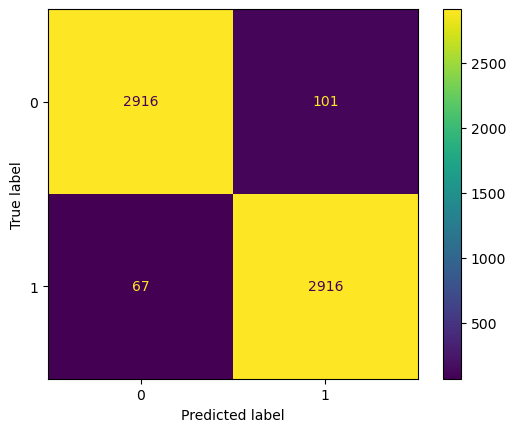

In [83]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
conf_mat = confusion_matrix(y_test,y_pred)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat).plot()
plt.savefig('../../../../../images/after_validation/neuronal_network/neuronal_network_confusion_matrix_before_tuning_v1',dpi=300, bbox_inches = "tight")

In [25]:
model_before.save('../../../saved_models/neuronal_network/neuronal_network_before_v1.keras')

In [28]:
def create_model(hp):
  num_hidden_layers=1 #hidden layer
  num_units=8
  dropout_rate=0.1 #dropout rate
  learning_rate=0.01 #learning_Rate

  if hp:  #creating a hyperparmeter with choices
    num_hidden_layers=hp.Choice('num_hidden_layers',values=[1,2,3])
    num_units = hp.Int('num_units', min_value=16, max_value=512, step=16)
    #num_units=hp.Choice('num_units',values=[8,16,32])
    dropout_rate=hp.Float('dropout_rate',min_value=0.1,max_value=0.5)
    learning_rate=hp.Float('learning_rate',min_value=0.0001,max_value=0.01)

  model=tf.keras.models.Sequential() #creating a sequential model

  model.add(layers.Flatten(input_dim=50)) #flatten the layer
  #model.add(layers.Lambda(lambda x: x/255.))

  for _ in range(0, num_hidden_layers):
    model.add(layers.Dense(num_units,activation='relu')) #relu activation
    model.add(layers.Dropout(dropout_rate))

  model.add(layers.Dense(1,activation='sigmoid')) #softmax activation

  model.compile(
      loss='binary_crossentropy',
      optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
      metrics=['accuracy']
  )
  return model

In [29]:
#defining a class with custom tuner using bayesian optimzation
class CustomTuner(keras_tuner.tuners.BayesianOptimization):
  def run_trial(self,trial, *args, **kwargs):
    kwargs['batch_size']=trial.hyperparameters.Int('batch_size',32,128,step=32) #giving batch size
    return super(CustomTuner,self).run_trial(trial,*args,**kwargs)

In [33]:
#running a custom tuner
tuner=CustomTuner(
    create_model,
    objective='val_accuracy', #validation accuracy
    max_trials=20,           #defining max number of trials
    directory='c:\\Users\\patri\\Documents\\FH_Technikum\\CS\\logs',
    project_name='phishing_tuning_v2',
    #overwrite=True
)

In [34]:
tuner.results_summary()

Results summary
Results in c:\Users\patri\Documents\FH_Technikum\CS\logs\phishing_tuning_v2
Showing 10 best trials
Objective(name="val_accuracy", direction="max")


In [35]:
tuner.search(X_train_normalized_selected,y_train, epochs=100, validation_data=(X_test_normalized_selected, y_test))

Trial 20 Complete [00h 02m 17s]
val_accuracy: 0.9763333201408386

Best val_accuracy So Far: 0.9769999980926514
Total elapsed time: 00h 21m 44s


In [36]:
tuner.results_summary(1)

Results summary
Results in c:\Users\patri\Documents\FH_Technikum\CS\logs\phishing_tuning_v2
Showing 1 best trials
Objective(name="val_accuracy", direction="max")

Trial 07 summary
Hyperparameters:
num_hidden_layers: 1
num_units: 96
dropout_rate: 0.15237893327997518
learning_rate: 0.003190115425181267
batch_size: 64
Score: 0.9769999980926514


In [37]:
model=tuner.get_best_models(num_models=1)[0]
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 96)                4896      
                                                                 
 dropout (Dropout)           (None, 96)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 97        
                                                                 
Total params: 4993 (19.50 KB)
Trainable params: 4993 (19.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
history=model.fit(X_train_normalized_selected,y_train,epochs=100,validation_data=(X_test_normalized_selected,y_test))

Epoch 1/100
438/438 [==============================] - 1s 1ms/step - loss: 0.0504 - accuracy: 0.9821 - val_loss: 0.0978 - val_accuracy: 0.9767
Epoch 2/100
438/438 [==============================] - 1s 1ms/step - loss: 0.0473 - accuracy: 0.9831 - val_loss: 0.1001 - val_accuracy: 0.9718
Epoch 3/100
438/438 [==============================] - 1s 1ms/step - loss: 0.0465 - accuracy: 0.9833 - val_loss: 0.0993 - val_accuracy: 0.9738
Epoch 4/100
438/438 [==============================] - 1s 1ms/step - loss: 0.0482 - accuracy: 0.9837 - val_loss: 0.1011 - val_accuracy: 0.9755
Epoch 5/100
438/438 [==============================] - 1s 1ms/step - loss: 0.0468 - accuracy: 0.9838 - val_loss: 0.0972 - val_accuracy: 0.9767
Epoch 6/100
438/438 [==============================] - 1s 1ms/step - loss: 0.0444 - accuracy: 0.9851 - val_loss: 0.1089 - val_accuracy: 0.9733
Epoch 7/100
438/438 [==============================] - 1s 1ms/step - loss: 0.0450 - accuracy: 0.9853 - val_loss: 0.0978 - val_accuracy: 0.9753

In [39]:
y_pred = model.predict(X_test_normalized_selected)
y_pred = tf.squeeze(y_pred)
y_pred = np.array([1 if x >= 0.5 else 0 for x in y_pred])

188/188 [==============================] - 0s 615us/step


Accuracy: 0.9713333333333334
Recall: 0.9735165940328528


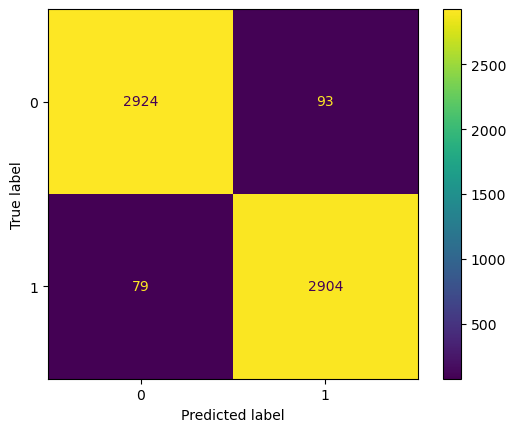

In [42]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
conf_mat = confusion_matrix(y_test,y_pred)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat).plot()

plt.savefig('../../../../../images/after_validation/neuronal_network/test',dpi=300, bbox_inches = "tight")

In [44]:
import os

In [48]:
os.listdir('../../../saved_models/neuronal_network')

[]

In [49]:
model.save('../../../saved_models/neuronal_network/neuronal_network_tuned_v2.keras')

In [39]:
model.save('../../../saved_models/neuronal_network/neuronal_network_tuned_v1.keras')

In [40]:
X_train_selected_test=pd.read_csv('neuronal_network_selected_train_features_v1.csv')

In [43]:
X_test_selected_test=pd.read_csv('neuronal_network_selected_test_features_v1.csv')

In [44]:
X_train_selected_test.set_index('url',inplace=True)
X_test_selected_test.set_index('url',inplace=True)

In [45]:
scaler = MinMaxScaler()
scaler.fit(X_train_selected_test)
X_train_normalized_selected_test = scaler.transform(X_train_selected_test)
X_test_normalized_selected_test = scaler.transform(X_test_selected_test)

In [47]:
model_test = keras.models.load_model('../../../saved_models/neuronal_network/neuronal_network_tuned_v1.keras')

In [48]:
model_test

In [49]:
y_pred_test = model_test.predict(X_test_normalized_selected_test)
y_pred_test = tf.squeeze(y_pred_test)
y_pred_test = np.array([1 if x >= 0.5 else 0 for x in y_pred_test])

188/188 [==============================] - 0s 663us/step


Accuracy: 0.9723333333333334
Recall: 0.9772041568890378


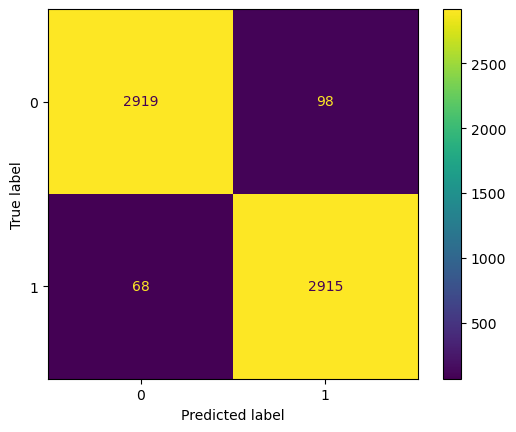

In [50]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_test))
print("Recall:",metrics.recall_score(y_test, y_pred_test))
conf_mat = confusion_matrix(y_test,y_pred_test)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat).plot()